# Identifying Linear Relationships Between Variables In Machine Learning

Linear models assume that the independent variables, `X`, take on a linear relationship with the dependent variable, `Y`. This relationship can be dictated by the following equation (Equation of a Straight Line)

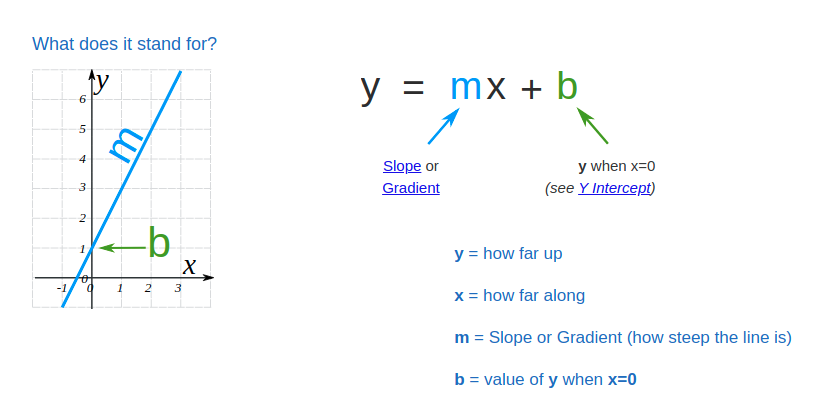

Source <a href="https://www.mathsisfun.com/equation_of_line.html" target="_blank">here</a>.

Here, `X` specifies the independent variables and `β` are the coefficients that indicate a change of unit in `Y` for a change of unit in `X`. If this assumption is not met, the performance of the model may be poor. Linear relationships can be evaluated using scatter plots and residual plots. Scatter plots result in the relationship of the independent variable `X` and the target `Y`.

The residuals (Loss - error) are the difference between the linear estimation of `Y` using `X` and the real target

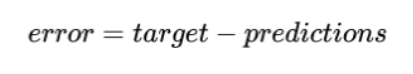


Linear models assume that the dependent variables `X` take on a linear relationship with the dependent variable `Y`. If the assumption is not true, the model may show poor performance. Let's visualize the linear relationships between `X` and `Y`. Let's import the following libraries: pandas, numpy, matplotlib, seaborn, and sklearn LinearRegression

In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for linear regression
from sklearn.linear_model import LinearRegression

Let's import the Boston Houses dataset from `skit-learn`

In [2]:
# the dataset for the demo
from sklearn.datasets import load_boston

this is how we load the dataframe from scikit-learn

In [3]:
boston_dataset = load_boston()

Then, we create the dataframe with the independent variables as follows

In [4]:
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


To access the values of '`y`', we do it in the following way = `boston_dataset.target`. Create a new column called `MEDV` with the function we just showed you, and show again the boston dataframe

In [6]:
# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Here is the information about the data set. Familiarize yourself with the variables before continuing with the exercise. 

The objective is to predict the "Mean House Value" The MEDV column in this data set and we have variables with features about the houses and neighborhoods. Run the following line

In [7]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Also read this article: <a href="https://www.narrativetext.co/lady-data/using-python-pandas-datareader-to-analyze-financial-data" target="_blank">Using Python & Pandas Datareader to Analyze Financial Data</a>**

Now create a dataframe with the variable `x` that follows a normal distribution and shows a linear relationship with `y`. Create a random seed of 29 to ensure reproducibility

In [8]:
np.random.seed(29) 

We define a variable `n` with the value 200, then a variable `x` with a numpy `randn` for a number of `n` samples. Finally we create the variable `y` by multiplying `x` by 10 and adding a numpy `randn` for a number of `n` samples multiplied by 2

In [9]:
n = 200

In [10]:
x = np.random.randn(n)

In [11]:
x

array([-0.41748213,  0.7060321 ,  1.9159847 , -2.1417555 ,  0.71905689,
        0.46707262,  0.76672253,  0.88200945,  0.80875066, -0.94716485,
       -0.12903843, -0.63086044, -1.43842284,  0.65220495,  0.98494561,
       -1.1444064 ,  0.38683645,  0.4265849 ,  2.10646128, -0.19786553,
       -0.2484003 ,  1.71381789, -0.27356624,  1.34747596,  0.34321934,
       -0.89567509,  2.11825131, -0.28609779,  0.24322882, -0.61897527,
        1.63784998, -0.05811961, -1.83694028, -0.7785032 ,  0.83320023,
       -0.04428776,  0.55439513, -0.4084749 , -0.46409435,  0.41800894,
        0.57453712, -1.74668412,  1.38228917, -1.26331079, -0.25736174,
       -0.96723108, -1.20666907,  2.66861402, -2.47113964,  0.07261643,
       -0.40761335, -1.14510085, -2.32342938,  0.08442342,  0.71087449,
        0.82788128, -1.59302662, -0.5079899 ,  2.55114425, -1.68596461,
       -0.47842946,  1.17949062, -0.00697292,  0.98764392,  0.22076528,
       -0.06161137, -1.03826422, -0.29860915,  0.37449239,  0.84

In [12]:
y = x * 10 + np.random.randn(n) * 2

In [13]:
y

array([-1.27156123e+00,  7.99059976e+00,  1.98486874e+01, -2.19289028e+01,
        5.57906972e+00,  3.71332303e+00,  5.52974425e+00,  5.69849836e+00,
        6.06961687e+00, -1.06978171e+01, -6.19183571e+00, -3.92516137e+00,
       -1.62849879e+01,  3.84159425e+00,  9.53395418e+00, -1.09399832e+01,
        5.30903568e+00,  5.51747996e+00,  2.15019040e+01, -4.55230737e+00,
       -5.33143408e+00,  1.67750657e+01, -3.70040475e+00,  1.47716230e+01,
        5.63108835e-01, -7.08489586e+00,  2.09775494e+01, -5.90283157e+00,
        3.39900771e+00, -7.09370309e+00,  1.98256205e+01,  8.95849572e-01,
       -1.54599159e+01, -5.32469918e+00,  1.06904639e+01,  4.19909882e-02,
        3.66857372e+00, -3.19911994e+00, -2.85613119e+00,  9.45815207e-01,
        5.84119698e+00, -1.86440086e+01,  1.58219467e+01, -1.30782422e+01,
       -4.47367719e+00, -1.04413754e+01, -9.13030428e+00,  2.29949809e+01,
       -2.75758231e+01,  1.58979356e+00, -8.06613163e+00, -1.09266183e+01,
       -2.24482209e+01,  

Now we create a dataframe with Pandas with the values of `x` and `y`

In [14]:
data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']
data.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


Then, we create a scatterplot with Seaborn for `x`, `y`, `data` and with an `order=1`

Text(0.5, 6.79999999999999, 'Independent variable')

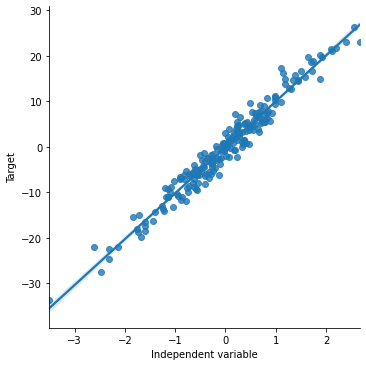

In [15]:
sns.lmplot(x="x", y="y", data=data, order=1)

plt.ylabel('Target')
plt.xlabel('Independent variable')

As you saw, so far we generated `x` and `y` randomly with Numpy, but we have not used the Boston House Prices dataset. We know now that the value of `y` in that dataset is `MEDV` because it is the variable we want to predict, that is, the price! While the values of `x` are all the other columns of the dataset. Scatterplots only allow us to compare two variables, so we must make a scatterplot for each variable `x`. Let's look at two of them

Graph a scatterplot with seaborn that takes the value of `x` to the `LSTAT` column and the value of `y` to `MEDV`

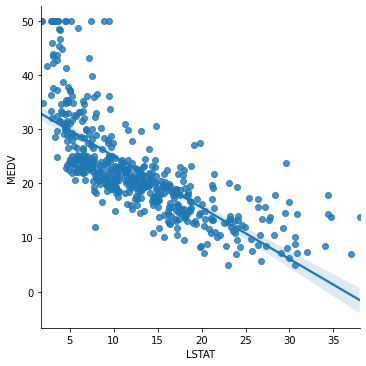

In [16]:
sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

Although not perfect, the relationship is quite linear. But notice that it is a negative linear relationship! because as `LSTAT` increases, the `MEDV` price decreases

Draw now the relationship between `CRIM` and `MEDV`

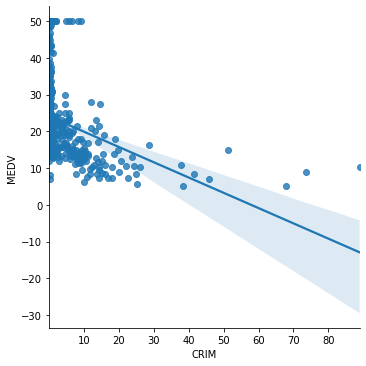

In [17]:
sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

As we have already seen, linear relationships can also be assessed by evaluating the residues. The residues are the difference between the estimated (predicted) and real value. If the relationship is linear, the residuals should be normally distributed and centered around zero.

**Also read this article: <a href="https://www.narrativetext.co/lewis-vs-data/building-a-linear-regression-model-that-predicts-retail-customer-spending" target="_blank">Building A Linear Regression Model That Predicts Retail Customer Spending</a>**

Create the model by instantiating scikit learn's `LinearRegression()` and assigning it to the variable `linreg`

In [18]:
linreg = LinearRegression()

Let's continue working with the dataframe we created with Numpy of only two columns `x` and `y`. Train the model with the scikit-learn fit method. Remember to pass the values of `x` as a DataFrame and not as a Serie

In [19]:
# fit the model
linreg.fit(data['x'].to_frame(), data['y'])

LinearRegression()

Let's get the predictions by calling the predict method of scikit-learn and passing as a parameter the values of `x` as a dataframe. Assign it to the predict variable

In [20]:
pred = linreg.predict(data['x'].to_frame())

In [21]:
pred

array([ -4.31267193,   7.02628565,  19.23761417, -21.71473253,
         7.15773711,   4.61461042,   7.63879794,   8.80231985,
         8.06296271,  -9.65844307,  -1.40158213,  -6.46617171,
       -14.61641634,   6.48304039,   9.841193  , -11.64908421,
         3.80483473,   4.20599206,  21.15998039,  -2.09621288,
        -2.60623008,  17.19726539,  -2.86021486,  13.4999952 ,
         3.36463337,  -9.13878771,  21.27897014,  -2.98668838,
         2.35548874,  -6.34622178,  16.43056662,  -0.68584082,
       -18.63841468,  -7.95624181,   8.30971761,  -0.54624427,
         5.49590438,  -4.22176734,  -4.7831012 ,   4.11944012,
         5.69918543, -17.7275132 ,  13.85134415, -12.84911509,
        -2.69667259,  -9.8609596 , -12.27746413,  26.83345205,
       -25.03900989,   0.63359985,  -4.21307224, -11.65609283,
       -23.54825844,   0.75276076,   7.07515699,   8.25603666,
       -16.17673989,  -5.22611279,  25.64789991, -17.11470755,
        -4.92777698,  11.80461953,  -0.16964788,   9.86

Calculate the residual values, and store them in a variable called `error`

In [22]:
error = data['y'] - pred

In [23]:
error

0      3.041111
1      0.964314
2      0.611073
3     -0.214170
4     -1.578667
         ...   
195   -0.495069
196    1.206319
197   -0.516651
198   -0.026771
199   -0.515181
Name: y, Length: 200, dtype: float64

Plot now the residual values with a Matplotlib scatterplot between `pred` and `y`

Text(0, 0.5, 'Real value')

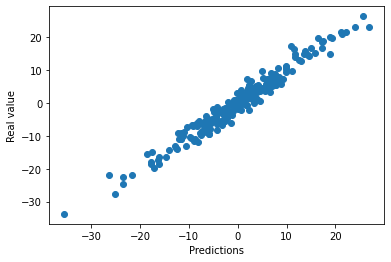

In [24]:
plt.scatter(x=pred, y=data['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

Let's see now the distribution of the residuals with another Matplotlib scatterplot between `error` and `x`

Text(0.5, 0, 'Independent variable x')

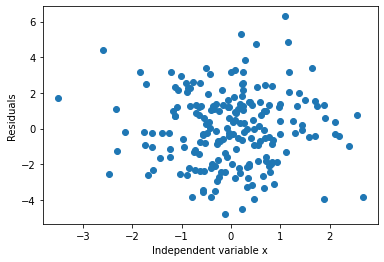

In [25]:
plt.scatter(y=error, x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

Let's now plot the distribution of the errors by drawing a Histogram with Seaborn displot, and with a bins of 30

/home/daniel/Desktop/narrativetext_project/notebooks/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

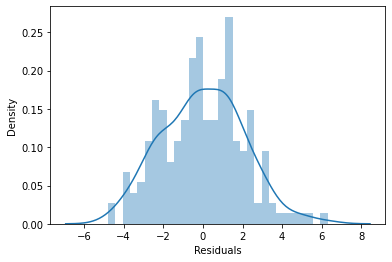

In [26]:
sns.distplot(error, bins=30)
plt.xlabel('Residuals')

Very well, we have done all the analysis of variables that have a linear relationship with the dataset created with Numpy. Now let's do the same steps but with the Boston Houses dataset, and taking into account only one Variable/Column = `LSTAT`. Then follow all the previous steps of training the model, predicting the model and plotting the relationship and the residuals

In [27]:
# call the linear model from sklearn
linreg = LinearRegression()

In [28]:
# fit the model
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

LinearRegression()

In [29]:
# make the predictions
pred = linreg.predict(boston['LSTAT'].to_frame())

In [30]:
# calculate the residuals
error = boston['MEDV'] - pred

Text(0, 0.5, 'MEDV')

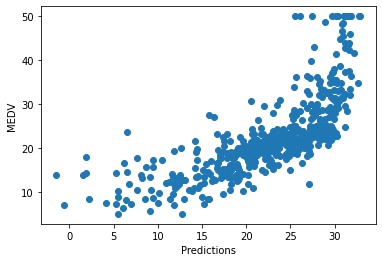

In [31]:
# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

Text(0.5, 0, 'LSTAT')

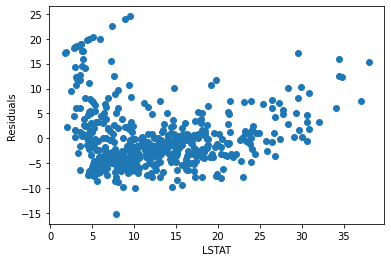

In [32]:
# Residuals plot

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

/home/daniel/Desktop/narrativetext_project/notebooks/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

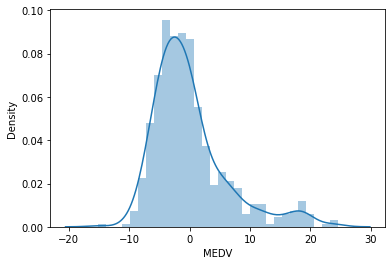

In [33]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)

### Conclusion

In this particular case, the residues are centered around zero, but are not distributed homogeneously among the `LSTAT` values. Larger and smaller `LSTAT` values show higher residual values. Furthermore, we see in the histogram that the residuals do not adopt a strictly Gaussian distribution.

Other notebooks you may be interested in:

* <a href="https://www.narrativetext.co/lady-data/creating-the-whole-machine-learning-pipeline-with-pycaret" target="_blank">Creating the Whole Machine Learning Pipeline with PyCaret</a>
* <a href="https://www.narrativetext.co/data-hub/using-predictive-power-score-to-pinpoint-non-linear-correlations" target="_blank">Using Predictive Power Score to Pinpoint Non-linear Correlations</a>
* <a href="https://www.narrativetext.co/the-analyst/using-pandas-profiling-to-accelerate-our-exploratory-analysis" target="_blank">Using Pandas Profiling to Accelerate Our Exploratory Analysis</a>